<a href="https://colab.research.google.com/github/devdastl/EVA-8_Phase-1_Assignment-7/blob/main/eva8_assignment_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pull main repo `eva8_source`.
This repo contains required resuable modules for following:
- Data preperation, augmentation, dataloader.
- Model architecture
- Main training and evaluation code 
- utility functions to plot graphs, misclassified images and gradCAM images.

In [1]:
import os
!git clone https://github.com/devdastl/eva8_source.git
os.chdir('eva8_source')

Cloning into 'eva8_source'...
remote: Enumerating objects: 93, done.
remote: Counting objects: 100% (93/93), done.
remote: Compressing objects: 100% (70/70), done.
remote: Total 93 (delta 28), reused 81 (delta 21), pack-reused 0
Unpacking objects: 100% (93/93), 39.72 MiB | 8.20 MiB/s, done.


## Importing required torch library

In [2]:
import torch
import torch.nn
from dataset.data import DataLoader

# install required pip packages
!python3 -m pip install -U albumentations
!python3 -m pip install grad-cam

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.5/123.5 KB 9.9 MB/s eta 0:00:00
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.2.1
    Uninstalling albumentations-1.2.1:
      Successfully uninstalled albumentations-1.2.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Get dataloader for training and evaluation set

In [3]:
my_loader= DataLoader(dataset_name='CIFAR10', batch_size=128)
train_loader, test_loader = my_loader.get_loader()

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


## Get model visualization

In [9]:
from models.resnet import ResNet18
!pip install torchsummary
from torchsummary import summary

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

my_model1 = ResNet18(num_class=10).to(device)
summary(my_model1, input_size=(3,32, 32))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0

## Imports of custom modules

In [10]:
from main.train import TrainModel
from main.eval import TestModel
from torch.optim.lr_scheduler import StepLR 
import torch.optim as optim

EPOCHS = 20

## Set Train,Test and model module instance and setup Optimizer, scheduler

In [19]:
my_model1 = my_model1 = ResNet18(num_class=10).to(device)
optimizer1 = optim.SGD(my_model1.parameters(), lr=0.01, momentum=0.9)
scheduler1 = StepLR(optimizer1, step_size=10, gamma=0.1) 

train_module1 = TrainModel(my_model1, device, train_loader, optimizer1)
test_module1 = TestModel(my_model1, device, test_loader)

## Main training loop

In [20]:
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    
    train_module1.train_a(L1_reg=False, l1_lambda=0.0001) # batch norm model with L1 regularization.
    test_module1.eval(epoch, EPOCHS)
    scheduler1.step()

EPOCH: 0


  0%|          | 0/391 [00:00<?, ?it/s]/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
Loss=1.3471697568893433 Batch_id=390 Accuracy=45.62: 100%|██████████| 391/391 [00:44<00:00,  8.73it/s]



Test set: Average loss: 1.0382, Accuracy: 6354/10000 (63.54%)

EPOCH: 1


Loss=1.0663354396820068 Batch_id=390 Accuracy=62.53: 100%|██████████| 391/391 [00:45<00:00,  8.55it/s]



Test set: Average loss: 0.9639, Accuracy: 6867/10000 (68.67%)

EPOCH: 2


Loss=1.074254035949707 Batch_id=390 Accuracy=68.81: 100%|██████████| 391/391 [00:45<00:00,  8.54it/s]



Test set: Average loss: 0.8485, Accuracy: 7108/10000 (71.08%)

EPOCH: 3


Loss=0.8392258882522583 Batch_id=390 Accuracy=72.60: 100%|██████████| 391/391 [00:45<00:00,  8.54it/s]



Test set: Average loss: 0.6872, Accuracy: 7694/10000 (76.94%)

EPOCH: 4


Loss=0.741211473941803 Batch_id=390 Accuracy=75.09: 100%|██████████| 391/391 [00:45<00:00,  8.55it/s]



Test set: Average loss: 0.5833, Accuracy: 7998/10000 (79.98%)

EPOCH: 5


Loss=0.7452735304832458 Batch_id=390 Accuracy=77.39: 100%|██████████| 391/391 [00:45<00:00,  8.53it/s]



Test set: Average loss: 0.5163, Accuracy: 8251/10000 (82.51%)

EPOCH: 6


Loss=0.6177955865859985 Batch_id=390 Accuracy=78.71: 100%|██████████| 391/391 [00:45<00:00,  8.50it/s]



Test set: Average loss: 0.5818, Accuracy: 8084/10000 (80.84%)

EPOCH: 7


Loss=0.6771344542503357 Batch_id=390 Accuracy=79.82: 100%|██████████| 391/391 [00:45<00:00,  8.54it/s]



Test set: Average loss: 0.5455, Accuracy: 8145/10000 (81.45%)

EPOCH: 8


Loss=0.5292428135871887 Batch_id=390 Accuracy=81.40: 100%|██████████| 391/391 [00:45<00:00,  8.56it/s]



Test set: Average loss: 0.4453, Accuracy: 8453/10000 (84.53%)

EPOCH: 9


Loss=0.5969616174697876 Batch_id=390 Accuracy=82.41: 100%|██████████| 391/391 [00:45<00:00,  8.53it/s]



Test set: Average loss: 0.4264, Accuracy: 8575/10000 (85.75%)

EPOCH: 10


Loss=0.3724521994590759 Batch_id=390 Accuracy=85.93: 100%|██████████| 391/391 [00:45<00:00,  8.55it/s]



Test set: Average loss: 0.3331, Accuracy: 8874/10000 (88.74%)

EPOCH: 11


Loss=0.3144468367099762 Batch_id=390 Accuracy=87.08: 100%|██████████| 391/391 [00:45<00:00,  8.57it/s]



Test set: Average loss: 0.3258, Accuracy: 8869/10000 (88.69%)

EPOCH: 12


Loss=0.3535805344581604 Batch_id=390 Accuracy=87.71: 100%|██████████| 391/391 [00:45<00:00,  8.57it/s]



Test set: Average loss: 0.3231, Accuracy: 8901/10000 (89.01%)

EPOCH: 13


Loss=0.28127098083496094 Batch_id=390 Accuracy=87.93: 100%|██████████| 391/391 [00:45<00:00,  8.51it/s]



Test set: Average loss: 0.3201, Accuracy: 8932/10000 (89.32%)

EPOCH: 14


Loss=0.3548209071159363 Batch_id=390 Accuracy=88.45: 100%|██████████| 391/391 [00:46<00:00,  8.48it/s]



Test set: Average loss: 0.3177, Accuracy: 8926/10000 (89.26%)

EPOCH: 15


Loss=0.3357871174812317 Batch_id=390 Accuracy=88.61: 100%|██████████| 391/391 [00:45<00:00,  8.53it/s]



Test set: Average loss: 0.3140, Accuracy: 8946/10000 (89.46%)

EPOCH: 16


Loss=0.5318164825439453 Batch_id=390 Accuracy=88.53: 100%|██████████| 391/391 [00:45<00:00,  8.53it/s]



Test set: Average loss: 0.3132, Accuracy: 8958/10000 (89.58%)

EPOCH: 17


Loss=0.3865199685096741 Batch_id=390 Accuracy=88.97: 100%|██████████| 391/391 [00:45<00:00,  8.55it/s]



Test set: Average loss: 0.3144, Accuracy: 8955/10000 (89.55%)

EPOCH: 18


Loss=0.20548447966575623 Batch_id=390 Accuracy=89.06: 100%|██████████| 391/391 [00:46<00:00,  8.50it/s]



Test set: Average loss: 0.3132, Accuracy: 8957/10000 (89.57%)

EPOCH: 19


Loss=0.36903080344200134 Batch_id=390 Accuracy=89.44: 100%|██████████| 391/391 [00:46<00:00,  8.50it/s]


generating mis-classified images for epoch 19
generating mis-classified images for epoch 19
generating mis-classified images for epoch 19
generating mis-classified images for epoch 19
generating mis-classified images for epoch 19
generating mis-classified images for epoch 19
generating mis-classified images for epoch 19
generating mis-classified images for epoch 19
generating mis-classified images for epoch 19
generating mis-classified images for epoch 19

Test set: Average loss: 0.3115, Accuracy: 8954/10000 (89.54%)



## Plot loss accuracy graph for model AND misclassified image

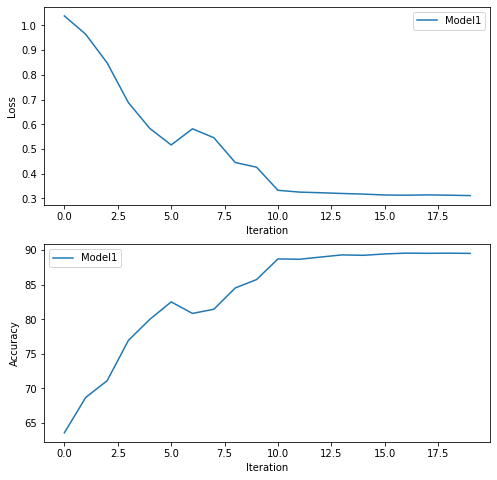

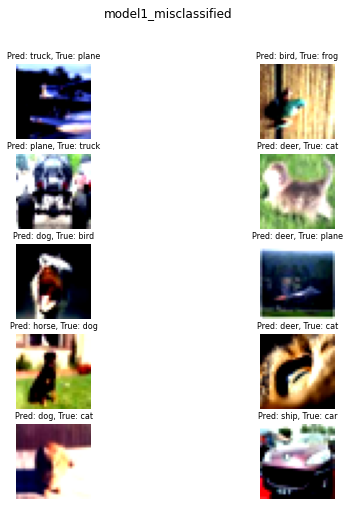

In [21]:
from util.plot_graph import plot_loss_accuracy

plot_loss_accuracy(test_module1)

from util.plot_misclassified import plot_misclassified
plot_misclassified(test_module1.test_misc_img, test_module1.test_misc_label, 'model1_misclassified')

## Plot GradCAM images of mis-classified images

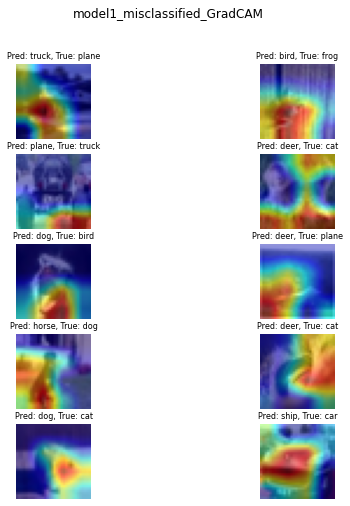

In [22]:
from util.get_gradcam import generate_grad
from util.plot_misclassified import plot_misclassified_grad

gradcam_img_list = generate_grad(test_module1.test_misc_img, my_model1.to('cpu'))

plot_misclassified_grad(gradcam_img_list, test_module1.test_misc_label, 'model1_misclassified_GradCAM')

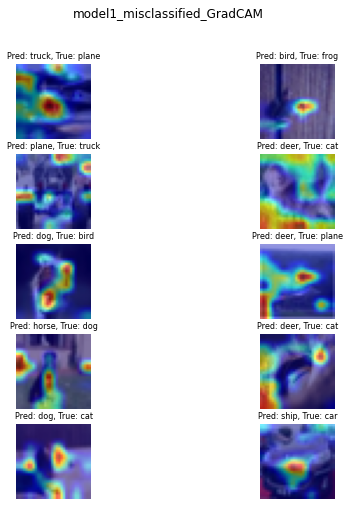

In [25]:
gradcam_img_l = generate_grad_l(test_module1.test_misc_img, my_model1.to('cpu'))

plot_misclassified_grad(gradcam_img_l, test_module1.test_misc_label, 'model1_misclassified_GradCAM')